In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# If False, change runtime options
torch.cuda.is_available()

True

# Prepare Data
- 12개의 (x, y) 쌍을 임의로 생성함. 의도적으로 선형 관계를 갖게 함.
- Matplotlib으로 시각화하여 대략적으로 데이터가 어떻게 생겼는지 파악.

In [0]:
# 12 data points (x, y) created manually
x = [1.1, 2.3, 3.7, 4.2, 5.9, 7.2, 8.1, 9.4, 3.2, 7.2, 5.3, 5.8]
y = [2.9, 5.5, 7.5, 10.4, 11.7, 13.3, 19.1, 22.1, 10.5, 20.1, 17.5, 5.5]

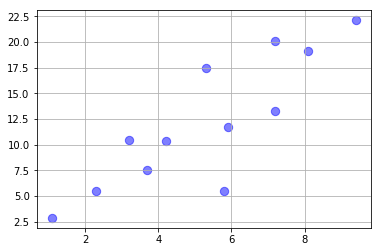

In [4]:
# 2D visualization with matplotlib
plt.scatter(x, y, alpha=0.5, c='blue', s=70)
plt.grid(True)
plt.show()

# Simple Linear Regression with PyTorch
- 선형회귀 문제의 최적해를 찾는 방법은 다양함.
- 인공신경망을 학습하는 경사하강법(Gradient Descent)으로도 선형회귀 문제의 해를 찾을 수 있음.
- PyTorch, Tensorflow와 같은 딥러닝 프레임워크는 미분을 자동으로 해주는 기능을 갖고 있음 ([AutoGrad](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html))
- PyTorch를 이용하여 단순 선형회귀 문제에 대한 해를 구해보자.

## 단일 업데이트 (Single Update)

Define inputs and targets ($x, y$)

In [5]:
# Convert lists into torch tensors
inputs = torch.tensor(x, requires_grad=False)   # x
targets = torch.tensor(y, requires_grad=False)  # y
print('Input:\n', inputs)
print('Target: \n', targets)

Input:
 tensor([1.1000, 2.3000, 3.7000, 4.2000, 5.9000, 7.2000, 8.1000, 9.4000, 3.2000,
        7.2000, 5.3000, 5.8000])
Target: 
 tensor([ 2.9000,  5.5000,  7.5000, 10.4000, 11.7000, 13.3000, 19.1000, 22.1000,
        10.5000, 20.1000, 17.5000,  5.5000])


Define weights ($w_1, w_0$)

In [6]:
# Trainable weights
w1 = torch.tensor([1.], requires_grad=True)
w0 = torch.tensor([1.], requires_grad=True)
print('Weights:\nw1:', w1, '\nw2:', w0)

Weights:
w1: tensor([1.], requires_grad=True) 
w2: tensor([1.], requires_grad=True)


$\hat{y}=w_1 \times x + w_0$

In [0]:
# Make prediction 
predictions = w1 * inputs + w0

$loss(y, \hat{y}) = (y-\hat{y})^2$

In [0]:
# Loss function (Mean squared error)
loss = (targets - predictions) ** 2
loss = torch.mean(loss)

In [0]:
# Calculate gradients
loss.backward()

In [10]:
# Check gradients
print('Gradient of w1:', w1.grad)
print('Gradient of w0:', w0.grad)

Gradient of w1: tensor([-75.3033])
Gradient of w0: tensor([-11.7833])


In [0]:
# Perform gradient descent
learning_rate = 0.1
sgd = torch.optim.SGD([w1, w0], lr=learning_rate)
sgd.step()

In [12]:
print('w1 after single update: ', w1)
print('w0 after single update: ', w0)

w1 after single update:  tensor([8.5303], requires_grad=True)
w0 after single update:  tensor([2.1783], requires_grad=True)


In [13]:
# Delete all gradients (mandatory)
sgd.zero_grad()
print('Gradient of w1:', w1.grad)
print('Gradient of w0:', w0.grad)

Gradient of w1: tensor([0.])
Gradient of w0: tensor([0.])


## 다중 업데이트 (Multiple Updates)

In [0]:
# Convert lists into torch tensors
inputs = torch.tensor(x, requires_grad=False)
targets = torch.tensor(y, requires_grad=False)

# Define trainable variables
w1 = torch.tensor([1.], requires_grad=True)
w0 = torch.tensor([1.], requires_grad=True)

In [0]:
# Define optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(params=[w1, w0], lr=learning_rate)

In [16]:
num_updates = 50

for i in range(num_updates):
    
    optimizer.zero_grad()
    
    predictions = inputs * w1 + w0
    
    loss = (targets - predictions) ** 2
    loss = loss.mean()
    loss.backward()
    
    optimizer.step()
    
    print('Iteration {:>02d}: Loss: {:.3f}'.format(i + 1, loss.item()))

Iteration 01: Loss: 52.894
Iteration 02: Loss: 47.284
Iteration 03: Loss: 42.419
Iteration 04: Loss: 38.199
Iteration 05: Loss: 34.540
Iteration 06: Loss: 31.366
Iteration 07: Loss: 28.613
Iteration 08: Loss: 26.225
Iteration 09: Loss: 24.155
Iteration 10: Loss: 22.359
Iteration 11: Loss: 20.802
Iteration 12: Loss: 19.451
Iteration 13: Loss: 18.279
Iteration 14: Loss: 17.263
Iteration 15: Loss: 16.382
Iteration 16: Loss: 15.618
Iteration 17: Loss: 14.955
Iteration 18: Loss: 14.380
Iteration 19: Loss: 13.881
Iteration 20: Loss: 13.449
Iteration 21: Loss: 13.074
Iteration 22: Loss: 12.749
Iteration 23: Loss: 12.467
Iteration 24: Loss: 12.222
Iteration 25: Loss: 12.010
Iteration 26: Loss: 11.826
Iteration 27: Loss: 11.666
Iteration 28: Loss: 11.528
Iteration 29: Loss: 11.407
Iteration 30: Loss: 11.303
Iteration 31: Loss: 11.213
Iteration 32: Loss: 11.135
Iteration 33: Loss: 11.067
Iteration 34: Loss: 11.008
Iteration 35: Loss: 10.957
Iteration 36: Loss: 10.912
Iteration 37: Loss: 10.874
I

## 최종 예측 및 시각화
- 학습이 완료된 선형회귀 모델($w_1, w_0$)을 사용하여 최종 예측을 해보자.

In [0]:
with torch.no_grad():

    # Make prediction
    y_pred = inputs * w1 + w0

    # Convert torch tensor -> numpy array
    y_pred = y_pred.to('cpu').numpy()

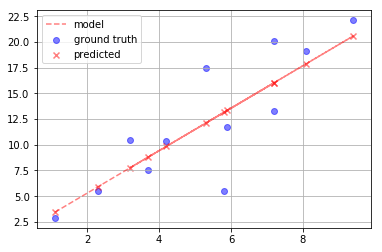

In [18]:
plt.scatter(x, y, c='blue', marker='o', alpha=.5, label='ground truth')
plt.scatter(x, y_pred, c='red', marker='x', alpha=.5, label='predicted')
plt.plot(x, y_pred, '--', c='red', alpha=.5, label='model')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()